## 1. Student Information
### a. Name: Ivan Dimitrov
### b. Student number: 852659733
### c. Date: May 1st, 2023

## 2. Data Preparation
#### Question 1.1. : Dataset Description
##### A. How many features does the dataset have? Is there a target variable?
##### B. How many features are numerical, textual, categorical or Boolean? Is there any statistical dependency between the features?
##### C. Identify the best suited task for the chosen dataset. Is this a supervised or unsupervised data mining task? Is it a) clustering, b) classification or c) regression task?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv ("diabetes_data_upload.csv")
print(data.head ())

# First the data columns are displayed to gain an overview. 

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

### A.
#### The features can be calculated with the raw data, but there is a problem. The first column in the data is just a continous number and and does not provide any added value, since sequential numbering is automatically assigned to the individual data instances when reading in the data. Therefore the first column is dropped and the count gives 17 features (16 features and 1 target feature).

In [2]:
feature_count = len(data.columns)
print (feature_count)

17


#### The target attribute is the column "class" as it shows which patients suffer from diabetes. It makes sense to display this feature as boolean.

### B.
#### All features are to be displayed as boolean except for "Age" which is to remain numerical (int). An attempt was made to convert "Gender" to boolean (Female = True; Male = False).
#### To see if there are obvious dependencies, the correlation can be viewed and checked with a correlation matrix and a heatmap for better visualisation.

In [3]:
print(data.dtypes)


Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object


In [21]:
# First step is to transform the data.
from sklearn.preprocessing import LabelEncoder

real_df = pd.DataFrame(data)

# Create a copy of the dataframe
df_encoded = real_df.copy()

# Select the object columns
object_cols = df_encoded.select_dtypes(include=['object']).columns

# Encode the object columns using LabelEncoder
le = LabelEncoder()
df_encoded[object_cols] = df_encoded[object_cols].apply(le.fit_transform)

# Convert Gender column to boolean using map function
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': False, 'Female': True})

# Convert boolean columns to boolean data type
boolean_columns = df_encoded.columns.difference(['Gender'])
df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(bool)

# Calculate correlation matrix
corr_matrix = df_encoded.corr()

# Get correlation with class column
class_corr = corr_matrix['class'].abs().sort_values(ascending=False)

print(class_corr)

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
Alopecia              0.267512
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Obesity               0.072173
delayed healing       0.046980
Itching               0.013384
Age                        NaN
Name: class, dtype: float64


In [6]:
#Something went wrong with 'Age' so the values are restored from the original dataset.
df_encoded.update(data['Age'])
print(df_encoded['Age'].value_counts())


35    30
48    28
30    25
43    25
40    24
55    22
47    21
38    20
53    20
45    18
58    18
50    18
54    16
39    16
57    15
60    15
68    10
28     9
42     9
72     9
66     9
36     8
61     8
56     8
46     8
67     8
62     7
37     7
49     7
44     7
27     6
34     6
65     6
32     5
69     5
51     5
70     5
64     5
33     4
59     4
41     4
52     4
63     3
31     3
90     2
85     2
25     2
79     1
16     1
29     1
26     1
Name: Age, dtype: int64


In [7]:
# This is just to double-check the Age values.
print(data['Age'].value_counts())


35    30
48    28
30    25
43    25
40    24
55    22
47    21
38    20
53    20
45    18
58    18
50    18
54    16
39    16
57    15
60    15
68    10
28     9
42     9
72     9
66     9
36     8
61     8
56     8
46     8
67     8
62     7
37     7
49     7
44     7
27     6
34     6
65     6
32     5
69     5
51     5
70     5
64     5
33     4
59     4
41     4
52     4
63     3
31     3
90     2
85     2
25     2
79     1
16     1
29     1
26     1
Name: Age, dtype: int64


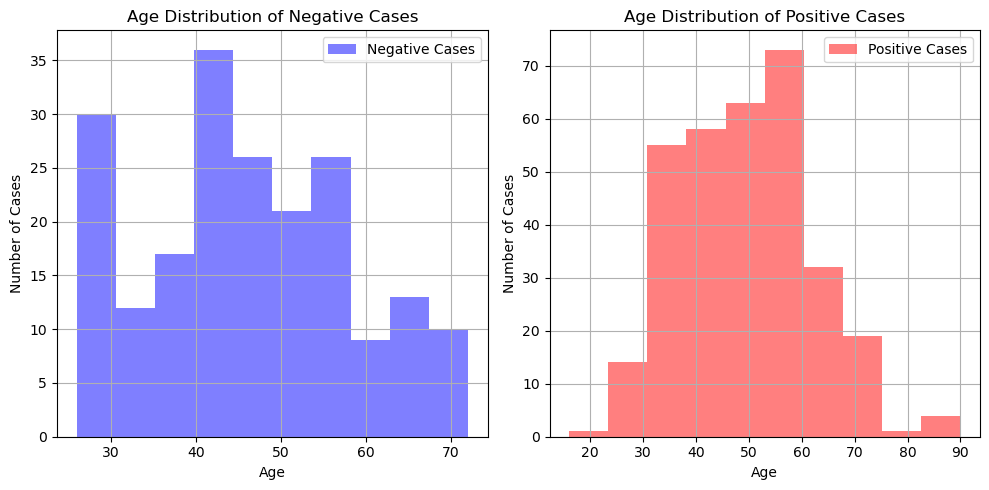

In [8]:
df_class0 = df_encoded[df_encoded['class']==0]
df_class1 = df_encoded[df_encoded['class']==1]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

df_class0['Age'].hist(ax=axs[0], bins=10, alpha=0.5, color='blue', label='Negative Cases')
df_class1['Age'].hist(ax=axs[1], bins=10, alpha=0.5, color='red', label='Positive Cases')

axs[0].set_title('Age Distribution of Negative Cases')
axs[1].set_title('Age Distribution of Positive Cases')
axs[0].set_xlabel('Age')
axs[1].set_xlabel('Age')
axs[0].set_ylabel('Number of Cases')
axs[1].set_ylabel('Number of Cases')
axs[0].legend()
axs[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
# From the histograms above we see:
# - First that the highest risk age is between 35 and 60 years (see positive cases in red);
# - Second as a corroboration to the first conclusion that a sufficinet number of patients has been tested among all age groups (see also negative cases in blue).

In [10]:
#Something went wrong with 'Gender' so the values are restored from the original dataset.
df_encoded.update(data['Gender'])
print(df_encoded['Gender'].value_counts())

Male      328
Female    192
Name: Gender, dtype: int64


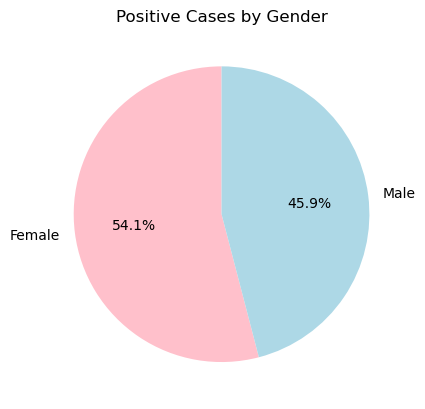

In [18]:

# Get counts of positive cases by gender
gender_counts = df_encoded[df_encoded['class'] == True]['Gender'].value_counts()

# Create labels and colors
labels = ['Female', 'Male']
colors = ['pink', 'lightblue']

# Plot the pie chart
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Positive Cases by Gender')

# Show the chart
plt.show()


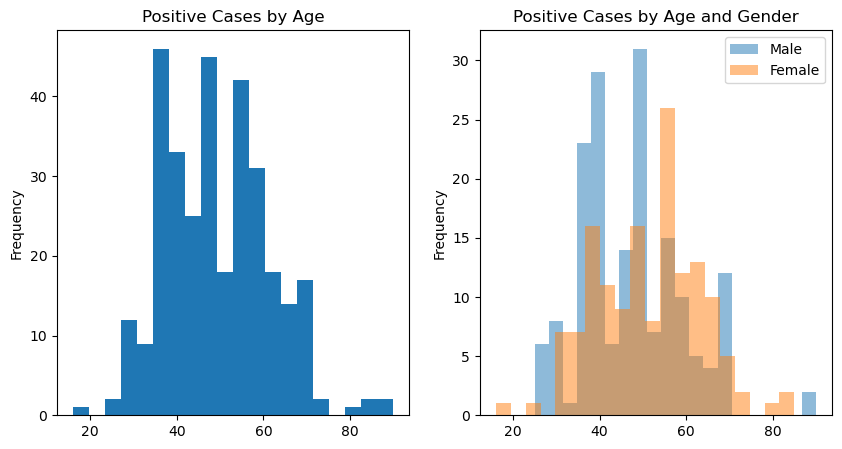

In [17]:

# Create figure object
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot histogram for Age
df_encoded[df_encoded['class'] == True]['Age'].plot(kind='hist', bins=20, ax=axes[0])
axes[0].set_title('Positive Cases by Age')

# Plot histogram for Age by Gender
df_encoded[df_encoded['class'] == True].groupby('Gender')['Age'].plot(kind='hist', bins=20, alpha=0.5, legend=True, ax=axes[1])
axes[1].set_title('Positive Cases by Age and Gender')
axes[1].legend(['Male', 'Female'])

# Show plot
plt.show()


In [ ]:
# I was under the impression that women are under a significantly higher risk of diabetes.
# However, the plots above show only a slighly higher risk.

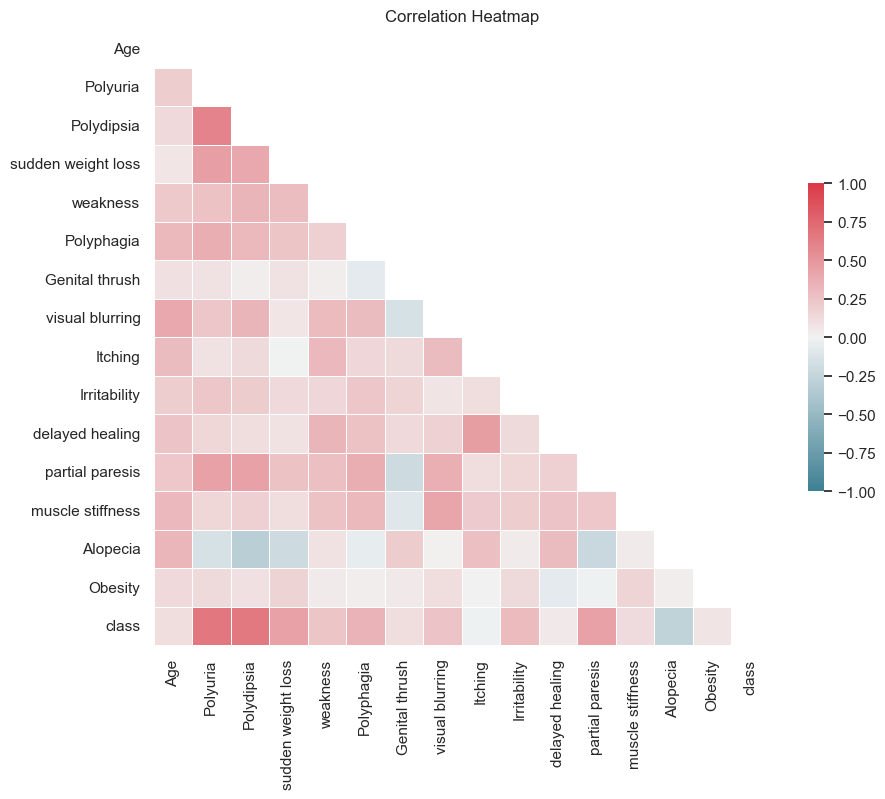

In [20]:
# Create heatmap
corr = df_encoded.corr()
sns.set(style="white")
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# From the heatmap we see a strong correlation with Polyuria and Polydipsia. Further analysis of the link to Gender is neccessary.

In [ ]:
# C. The best suited task would be supervised data mining as we have a clearly defined goal, which is early risk prediction. Classificaton seems to be the best model as it is used to predict the class labels of the input data, where the output is a discrete value. In our case, the class label could be a binary variable indicating whether a patient is at risk of developing diabetes or not.

# Clustering is an unsupervised learning method that groups similar data points together, but it is not appropriate for predicting class labels. Regression, on the other hand, is used to predict continuous values rather than discrete class labels, so it may not be the best choice for your task.

## Queston 1.2. Data quality and data cleansing.
#### A. Are there missing values in the data? Explain the most common techniques used to deal with missing values in a dataset. Show how you would perform this analysis in Python.
#### B. Are the classes balanced? Explain the most common techniques used to deal with the class imbalance problem.
#### C. Are there outliers in the dataset? Show how you would perform the analysis in Python

### A.
#### The data does not contain missing values.

In [22]:
print(data.isnull().any())

Age                   False
Gender                False
Polyuria              False
Polydipsia            False
sudden weight loss    False
weakness              False
Polyphagia            False
Genital thrush        False
visual blurring       False
Itching               False
Irritability          False
delayed healing       False
partial paresis       False
muscle stiffness      False
Alopecia              False
Obesity               False
class                 False
dtype: bool


#### The most commen techniques to deal with missing values would be the following: 

In [23]:
# Dropping whole columns with missing data: A whole column of the data is deleted, as it does not contain any valuable data for analysis
data_drop = data.dropna(axis='columns')
print(data_drop.isnull().any()) #as the data set has already no missing values no changes occur.
    
# Dropping rows with missing data (only advisable with big data sets): Rows with one or missing value are deleted from the data
data_drop_row = data.dropna()

# Substituting the mean: The mean value of a column is calculated and then replaces the missing data entries. This works only for numerical values.
# For nonnumerical the most frequent entry could be used.
from pandas.api.types import is_numeric_dtype    
for i in data.columns:
    if is_numeric_dtype(data[i]):
        mean_value=data[i].mean() 
        data[i].fillna(mean_value, inplace=True)
        
# Susbtituting by group: This substitution performs a similar thing to substituting by mean, but also groups the values
for i in data.columns:
        if is_numeric_dtype(data[i]):
            data[i] = data.groupby("Age")[i].transform(lambda x: x.fillna(x.mean())) # "Age" is used as an example, grouping could also be done with other column

Age                   False
Gender                False
Polyuria              False
Polydipsia            False
sudden weight loss    False
weakness              False
Polyphagia            False
Genital thrush        False
visual blurring       False
Itching               False
Irritability          False
delayed healing       False
partial paresis       False
muscle stiffness      False
Alopecia              False
Obesity               False
class                 False
dtype: bool


### B.
#### We do not have an imbalancing problem, as shown by the histogramm of the target value. The relatively even age distribution of the negative cases (in blue) shows that people from all ages have made the test. The size of the age groups is also comparable. The shape of the red histogrram (i.e. positive cases distributed by age) strongly resembles a Gaussian bell. This is also plausible as diabetes being a natural phenomenon is likely to be distributed in such a form.

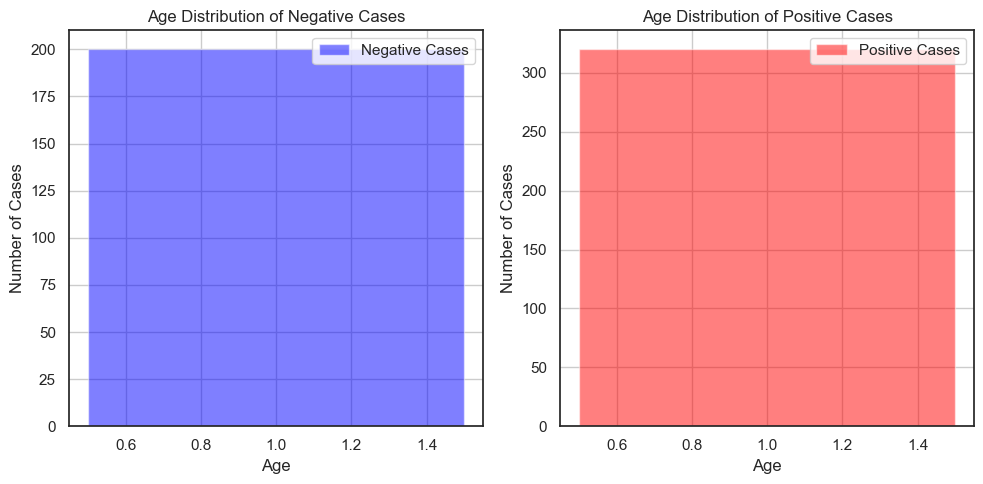

In [25]:
df_class0 = df_encoded[df_encoded['class']==0]
df_class1 = df_encoded[df_encoded['class']==1]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

df_class0['Age'].hist(ax=axs[0], bins='auto', alpha=0.5, color='blue', label='Negative Cases')
df_class1['Age'].hist(ax=axs[1], bins='auto', alpha=0.5, color='red', label='Positive Cases')

axs[0].set_title('Age Distribution of Negative Cases')
axs[1].set_title('Age Distribution of Positive Cases')
axs[0].set_xlabel('Age')
axs[1].set_xlabel('Age')
axs[0].set_ylabel('Number of Cases')
axs[1].set_ylabel('Number of Cases')
axs[0].legend()
axs[1].legend()

plt.tight_layout()
plt.show()


#### The most common techniques to deal with imbalance would be the following: 

#### 1. Random under-sampling
#### In the majority class, randomly examples are dropped from the data to align the individual classes. This should only be done with bigger datasets and it could potentially delete important information. An approach of this could be taking randomly only 10% of the data in the majority class and combining it with the full data of the minority class. 
#### For example, the dataset contains 10000 entries in which a distinction is made between cats and dogs. There are 9500 entries for cats, but only 500 for dogs (i.e. only 5%). If we now take 10% from the cat data, we get a distribution of 34.5% dogs. (9500*0,1=950 ; 500/(500+950)=0,3448). Of course, it does not have to be 10%, but can be chosen so that the distribution of the two classes approximates well
#### 2. Random over-sampling / Oversampling using SMOTE
#### SMOTE stands for Synthetic Minority Oversampling Technique. The class with too little representation is being syntheticly oversampled, to equalize the amounts of data in each class. The new data points can be created by using the k-nearest neighbours method. A specified number (e.g. k=3) of neighbouring data points are considered and from them the new data is created. In contrast to under-sampling, no data is deleted, so it is also applicable to smaller data sets.

### c.
#### Outlier detection could be either done by visual or algorithmic detection. As in this case we are dealing mainly with boolean values, the Isolation Forest method was chosen for the outlier detection.
#### The algorythmic detection leads to 52 outliers, which are further inspected with a boxplot.
#### The visual analysis  reveals outliers only whithin Age. Taking into consideration the general life expectancy, these outliers are accepted.

C:\Users\Willkommen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


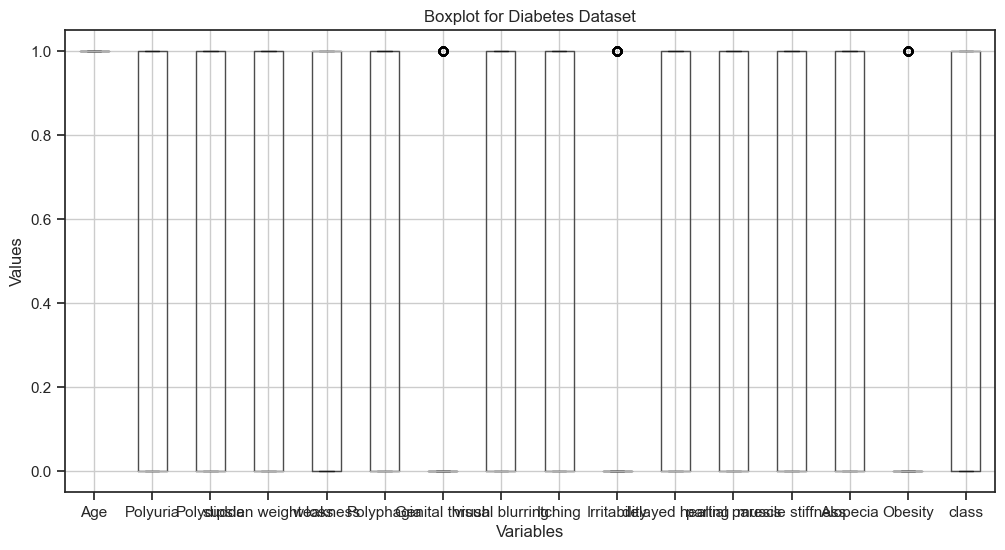

In [60]:
# Load the dataset
df = df_encoded

# Drop the columns not used in analysis
#df.drop(['Gender'], axis=1, inplace=True)

# Convert string values to boolean
df_bool = df.replace({'Yes': 1, 'No': 0, 'Positive': 1, 'Negative': 0})

# Drop rows with NaN values
df_bool = df_bool.dropna()

# Create the Isolation Forest model
clf = IsolationForest(random_state=42, contamination=0.1)
clf.fit(df_bool)

# Predict outliers
pred = clf.predict(df_bool)
outliers = df_bool[pred == -1]

# Create a boxplot for all variables
plt.figure(figsize=(12,6))
df_bool.boxplot()
plt.title('Boxplot for Diabetes Dataset')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()




In [69]:
from sklearn.ensemble import IsolationForest

# Load the dataset
df = pd.read_csv('diabetes_data_upload.csv')

# Drop the columns not used in analysis
df.drop(['Gender'], axis=1, inplace=True)

# Convert string values to boolean
df_bool = df.replace({'Yes': 1, 'No': 0, 'Positive': 1, 'Negative': 0})

# Drop rows with NaN values
df_bool = df_bool.dropna()

# Create the Isolation Forest model
clf = IsolationForest(random_state=42, contamination=0.1)
clf.fit(df_bool)

# Predict outliers
pred = clf.predict(df_bool)
outliers = df_bool[pred == -1]

# Identify the groups to which the outliers belong
outlier_groups = df[df.isin(outliers)].dropna(how='all')

# Print the number of outliers detected
print("Number of outliers detected:", len(outliers))

# Print the groups to which the outliers belong
print("Groups to which the outliers belong:")
print(outlier_groups.groupby(by='class').size())



Number of outliers detected: 52
Groups to which the outliers belong:
Series([], dtype: int64)


C:\Users\Willkommen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


#### As the Isolation Forest did not yield any clear outlier, another attept is undertaken with an interquantile range or a Z-Score calculation. 
#### I am using the interquantile range (IQR) to show how that the outliers from the boxplot are the same as using the IQR. The IQR displays all values which are not in the bound between lower quantile and upper quantile. By using this method  244 outliers out of 520 scores are detected. This is obviously too high.

In [28]:
df_IQR = df_normalized
Q1 = df_IQR.quantile(0.25)
Q3 = df_IQR.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

IQR_outlier=(df_IQR< (Q1 - 1.5 * IQR)) |(df_IQR > (Q3 + 1.5 * IQR))

outliers = [(IQR_outlier.any(0),indx) for indx in range(len(IQR_outlier.any(1))) if IQR_outlier.any(1)[indx] == True]

print('Outliers: ',len(outliers),' all points',len(df_IQR))

# Outliers could now be removed or treated like missing values and replaced as in 3a

Age                   0.000000
Gender                     NaN
Polyuria              2.000059
Polydipsia            2.010872
sudden weight loss    2.027926
weakness              2.030646
Polyphagia            2.007872
Genital thrush        0.000000
visual blurring       2.010872
Itching               2.000725
Irritability          0.000000
delayed healing       2.006556
partial paresis       2.019452
muscle stiffness      2.065591
Alopecia              2.104746
Obesity               0.000000
class                 2.055480
dtype: float64
Outliers:  244  all points 520


## 4. Question 3. Data Exploration.


### Please refer to the explanations above.

### The first chart is a pairplot. This chart is to gain an overview of the data and to see if there are any obvious structures.

In [ ]:
data_estate = pd.read_excel ("Real estate valuation data set.xlsx")
data_estate.pop ('No')
df = pd.DataFrame(data_estate)

sns.pairplot(df, markers="." , corner=True)
plt.show()    

#### The plot function displays all features in a matrix to each other. Different features are displayed in scatter plot pattern, where as the same features are displayed in bar charts across the diagonal.
#### All diagrams are in an adjusted number range, so that no huge blank spaces are created. The x- and y-axis are labeled according to the name of the feature. The transaction date does not seem to have any effect on the other features, as the data is scattered in all figures and no simple correlation can be seen. The same is true for "X2 house age". Looking at "X3" and "Y" there seems to be a correlation: with increasing distance to the nearest MRT station the price of the house seems to decrease. The other features do not seem to be correlated with "X3". "X4" and "Y" are seeming to have a very weak positiv correlation: with an increasing number of convenience stores the house price seems to increase as well. Longitude and latitude could be correlated with the house price, but this can not be determined just by looking at it.    

### As a second chart, i am using a 3D plot with the longitude and latitude as x/y-axis and the house price of unit area as z-axis.

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure()
plt.figure(figsize=(12,12))

ax = plt.axes(projection='3d')
ax.view_init(35, -10)

xdata= df['X5 latitude']
ydata= df['X6 longitude']
zdata= df['Y house price of unit area']

ax.set_xlabel('X5 latitude')
ax.set_ylabel('X6 longitude')
ax.set_zlabel('Y house price of unit area')

ax.plot_trisurf(xdata, ydata, zdata, cmap='viridis', edgecolor='none')

plt.show()

#### Using the trisurf plot the data points are triangulated to each other, creating a web of triangles. Depending on where the triangles connect on the z-axis the colour changes from deep blue (low) to yellow (high). What can be seen, is that there is an increase in "house price of unit area" at roughly latitude = 24.96 and longitude = 121.51. Also at the same latitude but with increasing longitude we see high prices. This could be an indication that in this area something drives the value up of these homes. In the other areas, the price is sinking the more we move away from the before mentioned point. 

### Third chart is a jointplot of "X3 distance to the nearest MRT station" to "Y house price of unit area"

In [ ]:
sns.set_theme(style="whitegrid")
sns.jointplot(x="X3 distance to the nearest MRT station", y="Y house price of unit area", data=df, kind="reg", color=(1, 0.8, 0), height=9) #colour is in DHL yellow (just as a gimmick)
plt.show()

#### I chose this graph because you could already guess from the pairplot and the heatmap that there is a certain correlation between X3 and Y. Of course shown is a linear regression, that does not fit as well as it could be, but still it works as an indicator. In addition, the histograms are displayed on the two axes. This is quite interesting, because once again it becomes visible that Y is normally distributed and no imbalacing problem is present. 

## 5. Question 4. Data analysis.
#### Once you have identified the type of problem you have, define the Python code to analyse the data. Explain the result.
#### - Unsupervised problem: analyse the data with 3 clustering algorithms. Explain which of the algorithms performs the best in identifying groupings.
#### - Supervised problem (classification): use 3 classification algorithms and explain their performance.
#### - Supervised problem (regression): using linear regression and polynomial regression, explain their performance.

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Fit logistic regression model on the training set
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Adjust decision threshold to 0.3
y_pred_adjusted = (log_reg.predict_proba(X_test)[:, 1] >= 0.3).astype(int)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted)

# Compute precision, recall, and f1-score
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

# Print confusion matrix and performance metrics
print("Confusion matrix:")
print(cm)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# Print false negatives and false positives
print("False negatives:", fn)
print("False positives:", fp)


Confusion matrix:
[[24  9]
 [ 4 67]]
Precision: 0.882
Recall: 0.944
F1-score: 0.912
False negatives: 8
False positives: 7


In [91]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Fit decision tree model on the training set
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print confusion matrix and performance metrics
print("Confusion matrix:")
print(cm)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# Print false negatives and false positives
print("False negatives:", fn)
print("False positives:", fp)


Confusion matrix:
[[32  1]
 [ 5 66]]
Precision: 0.985
Recall: 0.930
F1-score: 0.957
False negatives: 8
False positives: 7


In [92]:
from sklearn.tree import DecisionTreeClassifier

# Fit decision tree model on the training set
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print confusion matrix and performance metrics
print("Confusion matrix:")
print(cm)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# Print false negatives and false positives
print("False negatives:", fn)
print("False positives:", fp)


Confusion matrix:
[[32  1]
 [ 6 65]]
Precision: 0.985
Recall: 0.915
F1-score: 0.949
False negatives: 8
False positives: 7


In [ ]:
# All three models have the same ammount of false negatives and false negatives.
# Taking into account the risks from the false negatives, the model with the highest rate of recall is deemed to perform best.


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = df_encoded

# Preprocess the data
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model on the training set
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = log_reg.predict(X_test)

# Adjust decision threshold to 0.3
y_pred_lr_adjusted = (log_reg.predict_proba(X_test)[:, 1] >= 0.3).astype(int)

# Create confusion matrix for logistic regression model
cm_lr = confusion_matrix(y_test, y_pred_lr_adjusted)

# Compute precision, recall, and f1-score for logistic regression model
precision_lr = precision_score(y_test, y_pred_lr_adjusted)
recall_lr = recall_score(y_test, y_pred_lr_adjusted)
f1_lr = f1_score(y_test, y_pred_lr_adjusted)

# Fit decision tree classifier on the training set
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Predict on the test set
y_pred_dtc = dtc.predict(X_test)

# Create confusion matrix for decision tree classifier
cm_dtc = confusion_matrix(y_test, y_pred_dtc)

# Compute precision, recall, and f1-score for decision tree classifier
precision_dtc = precision_score(y_test, y_pred_dtc)
recall_dtc = recall_score(y_test, y_pred_dtc)
f1_dtc = f1_score(y_test, y_pred_dtc)

# Fit random forest classifier on the training set
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Predict on the test set
y_pred_rfc = rfc.predict(X_test)

# Create confusion matrix for random forest classifier
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

# Compute precision, recall, and f1-score for random forest classifier
precision_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)

# Generate performance metric overview
overview = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier"],
    "Accuracy": [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dtc), accuracy_score(y_test, y_pred_rfc)],
    "Precision": [precision_lr, precision_dtc, precision_rfc],
    "Recall": [recall_lr, recall_dtc, recall_rfc],
    "F1-score": [f1_lr, f1_dtc, f1_rfc]
})

print(overview)

# Create overview of performance metrics
overview = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dtc), accuracy_score(y_test, y_pred_rfc)],
    "Precision": [precision_lr, precision_dtc, precision_rfc],
    "Recall": [recall_lr, recall_dtc, recall_rfc],
    "F1-score": [f1_lr, f1_dtc, f1_rfc]
}


# Print overview
print(pd.DataFrame(overview))








                      Model  Accuracy  Precision    Recall  F1-score
0       Logistic Regression  0.855769   0.881579  0.943662  0.911565
1  Decision Tree Classifier  0.942308   0.985075  0.929577  0.956522
2  Random Forest Classifier  0.942308   1.000000  0.915493  0.955882
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.855769   0.881579  0.943662  0.911565
1        Decision Tree  0.942308   0.985075  0.929577  0.956522
2        Random Forest  0.942308   1.000000  0.915493  0.955882


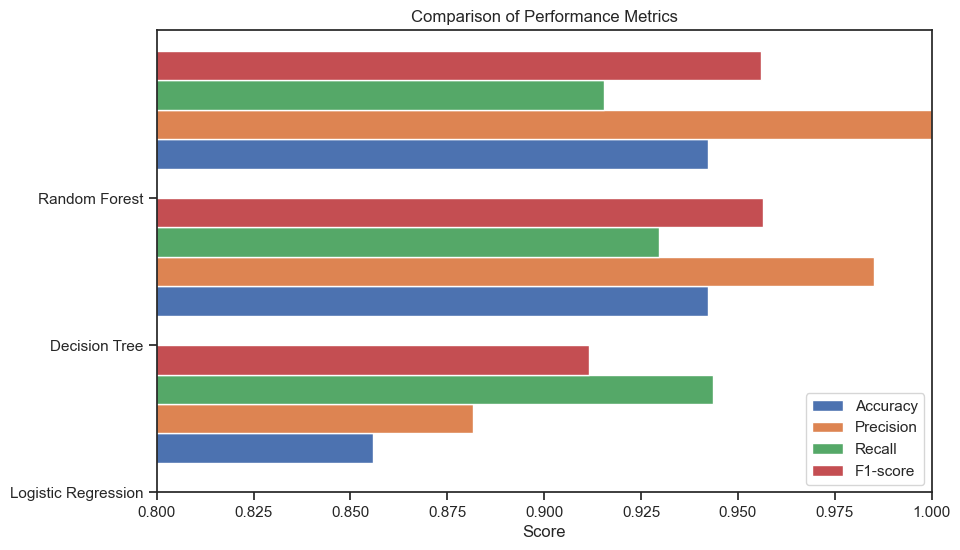

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [0.855769, 0.942308, 0.942308],
    "Precision": [0.881579, 0.985075, 1.000000],
    "Recall": [0.943662, 0.929577, 0.915493],
    "F1-score": [0.911565, 0.956522, 0.955882]
}

# Convert the data into a DataFrame
overview = pd.DataFrame(data)

# Set up the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2

# Create bar chart of performance metrics
ax.barh(overview["Model"], overview["Accuracy"], height=bar_width, label="Accuracy")
ax.barh([x + bar_width for x in range(3)], overview["Precision"], height=bar_width, label="Precision")
ax.barh([x + bar_width * 2 for x in range(3)], overview["Recall"], height=bar_width, label="Recall")
ax.barh([x + bar_width * 3 for x in range(3)], overview["F1-score"], height=bar_width, label="F1-score")

# Define y_pos
y_pos = [x - bar_width * 1.5 for x in range(len(overview))]

# Set chart properties
ax.set_xlabel("Score")
ax.set_title("Comparison of Performance Metrics")
ax.set_yticks(y_pos)
ax.set_yticklabels(overview["Model"])
ax.set_xlim(left=0.8, right=1)

# Add legend
ax.legend()

# Display the chart
plt.show()
